## Importing required packages


In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns


#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

from imblearn.over_sampling import RandomOverSampler

#FeatureEngineering
#!pip install lightgbm
#from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
#import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

print(pd.__version__)
print(np.__version__)
print(sns.__version__)

from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Using TensorFlow backend.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0.25.3
1.16.5
0.9.0
TensorFlow Version: 2.1.0
Default GPU Device: /device:GPU:0


In [2]:
# read bank.csv into a DataFrame
bank = pd.read_excel('C:/Users/shaur/Downloads/5. Bank Reviews-Complaints Analysis/BankReviews.xlsx')

In [219]:
bank.head()

,Reviews,Stars,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,count_words_upper,count_words_lower,...,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment
0,"Great job, Wyndham Capital! Each person was pr...",5,1,19,19,126,6.300000,4,0,14,...,0,0,0,"{'Each': 1, 'job,': 1, 'Wyndham': 1, 'process'...",0,0,0,0,0,0.533333
1,Matthew Richardson is professional and helpful...,5,1,25,23,159,6.115385,4,0,20,...,0,0,0,"{'the': 2, 'excellent': 1, 'mortgage.': 1, 'is...",0,0,0,0,0,0.453333
2,We had a past experience with Wyndham Mortgage...,5,1,79,64,462,5.775000,8,0,64,...,0,0,1,"{'went': 1, 'but': 1, 'viable': 1, 'that': 1, ...",0,0,0,0,0,-0.033231
3,We have been dealing with Brad Thomka from the...,5,1,108,78,605,5.550459,9,0,88,...,0,0,1,"{'went': 1, 'but': 2, '&': 1, 'beyond': 1, 'st...",0,0,0,0,0,0.093740
4,I can't express how grateful I am for the supp...,5,1,59,47,341,5.683333,6,3,50,...,0,0,1,"{'am': 1, 'that': 1, 'Zach': 2, 'support': 1, ...",0,0,0,0,0,0.125000


In [4]:
bank = bank[['Reviews','Stars']]

In [5]:
df = bank

In [6]:
df.head()

,Reviews,Stars
0,"Great job, Wyndham Capital! Each person was pr...",5
1,Matthew Richardson is professional and helpful...,5
2,We had a past experience with Wyndham Mortgage...,5
3,We have been dealing with Brad Thomka from the...,5
4,I can't express how grateful I am for the supp...,5


### Basic Exploratory Analysis

#### Note: It may take some time to process the function if the data is huge

In [7]:
df['Reviews'] = df['Reviews'].astype(str)
df['count_sent'] = df["Reviews"].apply(
    lambda x: len(re.findall("\n", str(x))) + 1)

#Word count in each comment:
df['count_word'] = df["Reviews"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word'] = df["Reviews"].apply(
    lambda x: len(set(str(x).split())))

#Letter count
df['count_letters'] = df["Reviews"].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word'] + 1)

#punctuation count
df["count_punctuations"] = df["Reviews"].apply(
    lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["Reviews"].apply(
    lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
df["count_words_lower"] = df["Reviews"].apply(
    lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["Reviews"].apply(
    lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["Reviews"].apply(
    lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["Reviews"].apply(
    lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Reviews'].apply(
    lambda x: len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Reviews'].apply(
    lambda x: len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Reviews'].apply(
    lambda x: len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
df['Spaces'] = df['Reviews'].apply(
    lambda x: len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Reviews'].apply(
    lambda x: len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['Reviews'].apply(
    lambda x: len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Reviews'].apply(
    lambda x: dict([[t, x.split().count(t)] for t in set(x.split())]))

pos_family = {
    'noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'pron': ['PRP', 'PRP$', 'WP', 'WP$'],
    'verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'adj': ['JJ', 'JJR', 'JJS'],
    'adv': ['RB', 'RBR', 'RBS', 'WRB']
}


# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = Reviewsblob.ReviewsBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt


df['noun_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'pron'))

In [8]:
df.head()

,Reviews,Stars,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,count_words_upper,count_words_lower,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,"Great job, Wyndham Capital! Each person was pr...",5,1,19,19,126,6.300000,4,0,14,...,15,0,0,0,"{'Each': 1, 'job,': 1, 'Wyndham': 1, 'process'...",0,0,0,0,0
1,Matthew Richardson is professional and helpful...,5,1,25,23,159,6.115385,4,0,20,...,21,0,0,0,"{'the': 2, 'excellent': 1, 'mortgage.': 1, 'is...",0,0,0,0,0
2,We had a past experience with Wyndham Mortgage...,5,1,79,64,462,5.775000,8,0,64,...,73,0,0,1,"{'went': 1, 'but': 1, 'viable': 1, 'that': 1, ...",0,0,0,0,0
3,We have been dealing with Brad Thomka from the...,5,1,108,78,605,5.550459,9,0,88,...,101,0,0,1,"{'went': 1, 'but': 2, '&': 1, 'beyond': 1, 'st...",0,0,0,0,0
4,I can't express how grateful I am for the supp...,5,1,59,47,341,5.683333,6,3,50,...,53,0,0,1,"{'am': 1, 'that': 1, 'Zach': 2, 'support': 1, ...",0,0,0,0,0


### Calculating Sentiment analysis using Textblob module

In [9]:
df['sentiment'] = df["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [10]:
df[['Reviews','Stars','sentiment']].head(20)

,Reviews,Stars,sentiment
0,"Great job, Wyndham Capital! Each person was pr...",5,0.533333
1,Matthew Richardson is professional and helpful...,5,0.453333
2,We had a past experience with Wyndham Mortgage...,5,-0.033231
3,We have been dealing with Brad Thomka from the...,5,0.093740
4,I can't express how grateful I am for the supp...,5,0.125000
5,I had the pleasure of working with Wyndham Cap...,5,0.345833
6,My experience with Mattison was beyond greatly...,5,0.313281
7,Patrick answered all my questions by email imm...,5,0.238435
8,I loved working with this group of people! The...,5,0.362500
9,Great web interface for both the loan applicat...,5,0.566667


In [11]:
bank.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

## Split the data into train & Test

In [12]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
#bank_best_worst = bank[(bank.stars==5) | (bank.stars==1)]

# define X and y
X = bank.Reviews
y = bank.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(378,)
(127,)
(378,)
(127,)


In [13]:
bank.shape

(505, 26)

In [14]:
bank.head()

,Reviews,Stars,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,count_words_upper,count_words_lower,...,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment
0,"Great job, Wyndham Capital! Each person was pr...",5,1,19,19,126,6.300000,4,0,14,...,0,0,0,"{'Each': 1, 'job,': 1, 'Wyndham': 1, 'process'...",0,0,0,0,0,0.533333
1,Matthew Richardson is professional and helpful...,5,1,25,23,159,6.115385,4,0,20,...,0,0,0,"{'the': 2, 'excellent': 1, 'mortgage.': 1, 'is...",0,0,0,0,0,0.453333
2,We had a past experience with Wyndham Mortgage...,5,1,79,64,462,5.775000,8,0,64,...,0,0,1,"{'went': 1, 'but': 1, 'viable': 1, 'that': 1, ...",0,0,0,0,0,-0.033231
3,We have been dealing with Brad Thomka from the...,5,1,108,78,605,5.550459,9,0,88,...,0,0,1,"{'went': 1, 'but': 2, '&': 1, 'beyond': 1, 'st...",0,0,0,0,0,0.093740
4,I can't express how grateful I am for the supp...,5,1,59,47,341,5.683333,6,3,50,...,0,0,1,"{'am': 1, 'that': 1, 'Zach': 2, 'support': 1, ...",0,0,0,0,0,0.125000


### Creating user defined functions for clean the text and pre-process the data

In [15]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()   #Text into lower case.
    text = text.strip()     #Remove spaces at the beginning and at the end of the string aka. Removing whitespaces.
    text = re.sub(r' +', ' ', text)  #Replace substrings
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return (text)

In [16]:
#Removing stop words with NLTK in Python

stop = set(nltk.corpus.stopwords.words('english'))

nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [18]:
X_train.head()

501    \r\nIt all started when Bob G ran a credit che...
172    \r\nGreat website, knowledgeable, responsive a...
80     \r\nIt was a pleasure working with Robert.  Fr...
46     It all started when Bob G ran a credit check w...
318    \r\nI agree with her 5 of 5 Star review. She w...
Name: Reviews, dtype: object

In [19]:
X_test.head()

307    \r\nIncredibly responsive and completed the pr...
343    \r\nWe have bought and sold multiple propertie...
47     What a horrible experience. We have excellent ...
67     \r\nKelly & Rasool were extremely helpful! It ...
361    \r\nOur last home purchase was a stressful and...
Name: Reviews, dtype: object

In [20]:
#Abbrevations and Words correction

X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [21]:
X_train.head()

501    it all started when bob g ran a credit check w...
172    great website knowledgeable responsive and alw...
80     it was a pleasure working with robert from the...
46     it all started when bob g ran a credit check w...
318    i agree with her  of  star review she was easy...
Name: Reviews, dtype: object

In [22]:
X_test.head()

307    incredibly responsive and completed the proces...
343    we have bought and sold multiple properties in...
47     what a horrible experience we have excellent c...
67     kelly & rasool were extremely helpful it was a...
361    our last home purchase was a stressful and cha...
Name: Reviews, dtype: object

In [23]:
#Pre processing and cleaning the data.

X_train=pre_process(X_train)
X_test=pre_process(X_test)

In [24]:
X_train.head()

501    started bob g ran credit check without knowled...
172    great website knowledgeable responsive always ...
80     pleasure working robert first call kept well i...
46     started bob g ran credit check without knowled...
318    agree star review easy clear work hello knowle...
Name: Reviews, dtype: object

In [25]:
X_test.head()

307    incredibly responsive completed process little...
343    bought sold multiple properties lifetime many ...
47     horrible experience excellent credit plenty in...
67     kelly & rasool extremely helpful stressful tim...
361    last home purchase stressful challenging proce...
Name: Reviews, dtype: object

### Vectorization (Count, Tfidf, Hashing)
        - Charter level
        - Word level
        - n-grams

In [26]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

In [27]:
xtrain_count

<378x596 sparse matrix of type '<class 'numpy.int64'>'
	with 9211 stored elements in Compressed Sparse Row format>

### View the document term metrics

In [28]:
dtm=xtrain_count.toarray()

In [29]:
dtm

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
count_vect.get_feature_names()

['aaron',
 'able',
 'absolutely',
 'accept',
 'accommodating',
 'account',
 'accurate',
 'across',
 'actual',
 'adam',
 'additional',
 'advice',
 'agent',
 'agreed',
 'alex',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'american',
 'amount',
 'another',
 'answer',
 'answered',
 'answering',
 'answers',
 'anyone',
 'anything',
 'application',
 'apply',
 'appraisal',
 'appraiser',
 'appreciate',
 'appreciated',
 'approved',
 'around',
 'ask',
 'asked',
 'asking',
 'aspects',
 'attention',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'balance',
 'bank',
 'banks',
 'barrett',
 'based',
 'became',
 'beginning',
 'beneficial',
 'best',
 'better',
 'beyond',
 'big',
 'bob',
 'brent',
 'broker',
 'business',
 'buy',
 'buyer',
 'buyers',
 'buying',
 'ca',
 'call',
 'called',
 'calling',
 'calls',
 'calm',
 'came',
 'cannot',
 'cant',
 'capital',
 'care',
 'causing',
 'certainly',
 'change',
 'changed',
 'check',
 'chose',
 'chris',
 'circumstances',
 'clear',
 'cli

In [31]:
dtm1=pd.DataFrame(dtm, columns = count_vect.get_feature_names())

In [32]:
dtm1.head()

,aaron,able,absolutely,accept,accommodating,account,accurate,across,actual,adam,...,working,works,would,wouldnt,writing,wrong,wyndham,year,years,yet
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorization (count, tfidf) for both train & test

In [33]:
#Train
count_vect = CountVectorizer(analyzer='word',
                             token_pattern=r'\w{1,}',
                             ngram_range=(1, 1),
                             min_df=5,
                             encoding='latin-1',
                             max_features=800)

xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [42]:
X_train_tfidf

<378x596 sparse matrix of type '<class 'numpy.float64'>'
	with 9211 stored elements in Compressed Sparse Row format>

In [37]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [69]:
dtm2.head(20)

,aaron,able,absolutely,accept,accommodating,account,accurate,across,actual,adam,...,working,works,would,wouldnt,writing,wrong,wyndham,year,years,yet
0,0.0,0.0,0.000000,0.133259,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.123737,0.0,0.0,0.0,0.0,0.096250,0.000000
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.194406,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.130702,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.121363,0.0,0.0,0.0,0.0,0.094403,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.084774,0.175643,0.0,0.0,0.0,0.0,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.256938,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.068074,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
8,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
9,0.0,0.0,0.228774,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [40]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word',
                                   token_pattern='\w{1,}',
                                   ngram_range=(1, 2),
                                   max_features=800)
tfidf_vect_ngram.fit(df['Reviews'])
xtrain_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram = tfidf_vect_ngram.transform(X_test)

In [48]:
xtrain_tfidf_ngram

<378x800 sparse matrix of type '<class 'numpy.float64'>'
	with 8058 stored elements in Compressed Sparse Row format>

In [66]:
dtm3=pd.DataFrame(xtrain_tfidf_ngram.toarray(), columns= tfidf_vect_ngram.get_feature_names())

In [68]:
dtm3.head(20)

,1,10,2,3,4,5,a,a few,a great,a home,...,would recommend,wouldn,wouldn t,wyndham,year,years,you,you are,you can,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.112647,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.109433,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Word Cloud


In [90]:
frequency_words_wo_stop = {}
for data in bank['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [91]:
frequency_words_wo_stop

{'great': 139,
 'job': 25,
 ',': 1135,
 'wyndham': 16,
 'capital': 12,
 '!': 222,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'us': 207,
 'move': 12,
 'refinance': 70,
 'process': 253,
 'smoothly': 15,
 '.': 1976,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 56,
 'find': 19,
 'correct': 1,
 'product': 10,
 'mortgage': 147,
 'much': 38,
 'excellent': 30,
 'service': 99,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 7,
 'use': 48,
 'needed': 29,
 '!!': 24,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 28,
 'wrong': 7,
 'encountered': 7,
 'servicer': 3,
 'dealing': 14,
 'previous': 13,
 'loan': 313,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 8,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 65,
 'recommend': 156,
 'brad': 7,
 'thomka': 3,
 'team': 113,
 'needs': 27,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 '&': 30,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'ti

In [94]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(250,100))
plt.imshow(wordcloud)

### Classify reviews to positive, negative and neutral


In [95]:
# We use textblob utility to calculate polarity
def get_sentiment(text):
    # create TextBlob object of passed text
    analysis = TextBlob(text)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [96]:
text = X_train
sentiment = X_train.apply(lambda x: get_sentiment(x))
Table = pd.concat([text,sentiment],axis=1)
column_names = Table.columns.values
column_names[1] = 'Sentiment'
Table.columns = column_names
Table

,Reviews,Sentiment
501,started bob g ran credit check without knowled...,positive
172,great website knowledgeable responsive always ...,positive
80,pleasure working robert first call kept well i...,positive
46,started bob g ran credit check without knowled...,positive
318,agree star review easy clear work hello knowle...,positive
...,...,...
255,vanessa word fantastic every step way perfect ...,positive
72,fast easy leave comforts home steven shatz fri...,positive
396,friend mine told refinanced house unbelievable...,positive
235,worked jon barrett processing refinance loan q...,positive


In [97]:
# picking positive reviews
positive = Table[Table.Sentiment == 'positive']
# percentage of positive reviews
print("Positive tweets percentage: {} %".format(100 * len(positive) /
                                                len(Table.Reviews)))

# picking negative reviews
negative = Table[Table.Sentiment == 'negative']
# percentage of negative reviews
print("Negative tweets percentage: {} %".format(100 * len(negative) /
                                                len(Table.Reviews)))

# percentage of neutral reviews
print("Neutral tweets percentage: {} %".format(
    100 * (len(Table.Reviews) - len(negative) - len(positive)) /
    len(Table.Reviews)))

Positive tweets percentage: 89.41798941798942 %
Negative tweets percentage: 7.407407407407407 %
Neutral tweets percentage: 3.1746031746031744 %


In [98]:
# Top 5 positive reviews
positive.head(5)['Reviews'].tolist()

['started bob g ran credit check without knowledge consent agreed use nasb bob told could close less weeksit took day closing still asking paperwork day closing household goods unpacked told power attorney could used fly id wife take docs notary fedex back also get bank check send docs wouldnt accept personal check five days later driving id nc coordinate closing docs already sent sale home sent could send four houses purchased past years stressful read',
 'great website knowledgeable responsive always got back us quickly answers questions mortgage process tedious made easy',
 'pleasure working robert first call kept well informed every step refinancing also made sure understood everything completely fast responding helping questions',
 'started bob g ran credit check without knowledge consent agreed use nasb bob told could close less weeksit took day closing still asking paperwork day closing household goods unpacked told power attorney could used fly id wife take docs notary fedex ba

In [99]:
# Top 5 negative reviews
negative.head(5)['Reviews'].tolist()

['use reliance first capitoldo let kenneth watson help youi frustrated himhe arrogantevery time talked would always saylet call back minutesi wouldnt hear couple daysand happened probably timesit wasnt extremely badwe raise credit score took probably monthbut took little months get everything said donethen lost paper workwe get redonetheni also motorcycle addedconsolidationit supposed percent payoffwell didnt get money pay bike offagainlet call title company ill call back mindidnt hear himso called back next daywhat read',
 'jason chandler team worked hard ensure able purchase beautiful home cant explain difficult situation everything couldve possibly went wrong managed go wrong frustrated jason kept us right track helped us resolve issues able close loan forever grateful team thank guys defiantly recommend company everyone needing home loan read',
 'based results give star initial conversations course hour provided info based anthony said would give options moving forward next day tal

### Create user defined function for train the models

In [49]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,
                valid_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return metrics.accuracy_score(classifier.predict(feature_vector_train),
                                  label), metrics.accuracy_score(
                                      predictions, valid_y)

### Building different models with different vectors

In [50]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  1   5]
 [ 70 308]]


In [53]:
xtrain_count

<378x596 sparse matrix of type '<class 'numpy.int64'>'
	with 9211 stored elements in Compressed Sparse Row format>

In [72]:
dtm1.head()   #Count Vectorizer

,aaron,able,absolutely,accept,accommodating,account,accurate,across,actual,adam,...,working,works,would,wouldnt,writing,wrong,wyndham,year,years,yet
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X_train_tfidf 

<378x596 sparse matrix of type '<class 'numpy.float64'>'
	with 9211 stored elements in Compressed Sparse Row format>

In [73]:
dtm2.head()  #TF-IDF Count Vectorizer

,aaron,able,absolutely,accept,accommodating,account,accurate,across,actual,adam,...,working,works,would,wouldnt,writing,wrong,wyndham,year,years,yet
0,0.0,0.0,0.0,0.133259,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.123737,0.0,0.0,0.0,0.0,0.096250,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194406,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.130702,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.121363,0.0,0.0,0.0,0.0,0.094403,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [71]:
xtrain_tfidf_ngram

<378x800 sparse matrix of type '<class 'numpy.float64'>'
	with 8058 stored elements in Compressed Sparse Row format>

In [74]:
dtm3.head() #TF-IDF Count Vectorizer with unigram and bigram.

,1,10,2,3,4,5,a,a few,a great,a home,...,would recommend,wouldn,wouldn t,wyndham,year,years,you,you are,you can,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.112647,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.109433,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [116]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  1   5]
 [ 70 308]]


#### The y variable is imbalanced. We have to under/over sample the data. Therefore, applying over sampling for balancing the data as it is more frequently used in the industry.

In [117]:
#!pip install imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=123)

X_train_tfidf_os, y_train_tfidf_os = ros.fit_sample(X_train_tfidf, y_train)

X_train_cnt_os, y_train_cnt_os = ros.fit_sample(xtrain_count, y_train)

X_train_tfidf_ngram_os, y_train_tfidf_ngram_os = ros.fit_sample(xtrain_tfidf_ngram, y_train)

unique_elements, counts_elements = np.unique(y_train_tfidf_os, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  1   5]
 [308 308]]


In [118]:
#Naive Bayes
# Naive Bayes on TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_os,
                          y_train_tfidf_os, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_cnt_os,
                          y_train_cnt_os, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram_os,
                          y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)

NB  for L1, Count Vectors:  (0.9756493506493507, 0.952755905511811)
NB  for L1, WordLevel TF-IDF:  (0.9724025974025974, 0.9606299212598425)
NB  for L1, N-Gram Vectors:  (0.974025974025974, 0.9448818897637795)


In [119]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf_os,
                          y_train_tfidf_os, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_cnt_os, y_train_cnt_os,
                          xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf_ngram_os,
                          y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  (0.9837662337662337, 0.968503937007874)
LR  for L1, WordLevel TF-IDF:  (0.9983766233766234, 0.9763779527559056)
LR  for L1, N-Gram Vectors:  (0.9756493506493507, 0.9606299212598425)


In [120]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(SVC(), X_train_tfidf_os, y_train_tfidf_os,
                          X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)

# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(SVC(), X_train_cnt_os, y_train_cnt_os, xtest_count,
                          y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(SVC(), X_train_tfidf_ngram_os,
                          y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  (0.9983766233766234, 0.937007874015748)
SVC  for L1, WordLevel TF-IDF:  (0.9756493506493507, 0.9448818897637795)
SVC  for L1, N-Gram Vectors:  (0.9983766233766234, 0.9448818897637795)


In [121]:
from sklearn.ensemble import RandomForestClassifier

accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf_os,
                          y_train_tfidf_os, X_test_tfidf, y_test)
print("Boosting for L1, Count Vectors: ", accuracy_L1)

# XGB Classifier on Word Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), X_train_cnt_os,
                          y_train_cnt_os, xtest_count, y_test)
print("Boosting for L1, WordLevel TF-IDF: ", accuracy_L1)

# XGB Classifier on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(RandomForestClassifier(), X_train_tfidf_ngram_os,
                          y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("Boosting for L1, N-Gram Vectors: ", accuracy_L1)

Boosting for L1, Count Vectors:  (0.9983766233766234, 0.937007874015748)
Boosting for L1, WordLevel TF-IDF:  (0.9983766233766234, 0.9763779527559056)
Boosting for L1, N-Gram Vectors:  (0.9983766233766234, 0.9212598425196851)


In [122]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [70, 80, 90, 100, 120, 150, 200],
    'max_features': [5, 6, 7, 8, 9, 10],
}

rgscv = GridSearchCV(RandomForestClassifier(random_state=12345),
                     param_grid,
                     cv=10,
                     verbose=False,
                     n_jobs=-1)

from sklearn.ensemble import RandomForestClassifier

accuracy_L1 = train_model(rgscv, X_train_tfidf_os,
                          y_train_tfidf_os, X_test_tfidf, y_test)
print("Boosting for L1, Count Vectors: ", accuracy_L1)

# XGB Classifier on Word Level TF IDF Vectors
accuracy_L1 = train_model(rgscv, X_train_cnt_os,
                          y_train_cnt_os, xtest_count, y_test)
print("Boosting for L1, WordLevel TF-IDF: ", accuracy_L1)

# XGB Classifier on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(rgscv, X_train_tfidf_ngram_os,
                          y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("Boosting for L1, N-Gram Vectors: ", accuracy_L1)

Boosting for L1, Count Vectors:  (0.9983766233766234, 0.905511811023622)
Boosting for L1, WordLevel TF-IDF:  (0.9983766233766234, 0.9212598425196851)
Boosting for L1, N-Gram Vectors:  (0.9983766233766234, 0.905511811023622)


In [123]:
import xgboost
# XGB Classifier on Count Vectors and TF-IDF
accuracy_L1 = train_model(xgboost.XGBClassifier(), X_train_tfidf_os,
                          y_train_tfidf_os, X_test_tfidf, y_test)
print("Boosting for L1, Count Vectors: ", accuracy_L1)

# XGB Classifier on Word Level TF IDF Vectors
accuracy_L1 = train_model(xgboost.XGBClassifier(), X_train_cnt_os,
                          y_train_cnt_os, xtest_count, y_test)
print("Boosting for L1, WordLevel TF-IDF: ", accuracy_L1)

# XGB Classifier on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(xgboost.XGBClassifier(), X_train_tfidf_ngram_os,
                          y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("Boosting for L1, N-Gram Vectors: ", accuracy_L1)

Boosting for L1, Count Vectors:  (0.9983766233766234, 0.9291338582677166)
Boosting for L1, WordLevel TF-IDF:  (0.9983766233766234, 0.9448818897637795)
Boosting for L1, N-Gram Vectors:  (0.9918831168831169, 0.9212598425196851)


In [124]:
from sklearn.model_selection import GridSearchCV
pargrid_grad = {'n_estimators': [50, 70, 90, 100, 200],
                   'learning_rate': [10 ** x for x in range(-3, 1)]}

xgb_gscv = GridSearchCV(estimator = xgboost.XGBClassifier(), 
                        param_grid = pargrid_grad, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

# XGB Classifier on Count Vectors and TF-IDF
accuracy_L1 = train_model(xgb_gscv, X_train_tfidf_os,
                          y_train_tfidf_os, X_test_tfidf, y_test)
print("Boosting for L1, Count Vectors: ", accuracy_L1)

# XGB Classifier on Word Level TF IDF Vectors
accuracy_L1 = train_model(xgb_gscv, X_train_cnt_os,
                          y_train_cnt_os, xtest_count, y_test)
print("Boosting for L1, WordLevel TF-IDF: ", accuracy_L1)

# XGB Classifier on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(xgb_gscv, X_train_tfidf_ngram_os,
                          y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("Boosting for L1, N-Gram Vectors: ", accuracy_L1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished


Boosting for L1, Count Vectors:  (0.9983766233766234, 0.9448818897637795)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


Boosting for L1, WordLevel TF-IDF:  (0.9951298701298701, 0.952755905511811)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.1s finished


Boosting for L1, N-Gram Vectors:  (0.9918831168831169, 0.9212598425196851)


#### We have got great predictions with all the ML algorithms. We will choose Logistic Regression as it gave the best score in test dataset.

### Predicting star ratings using reviews


In [184]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf_os,
                          y_train_tfidf_os, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_cnt_os, y_train_cnt_os,
                          xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf_ngram_os,
                          y_train_tfidf_ngram_os, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  (0.9837662337662337, 0.968503937007874)
LR  for L1, WordLevel TF-IDF:  (0.9983766233766234, 0.9763779527559056)
LR  for L1, N-Gram Vectors:  (0.9756493506493507, 0.9606299212598425)


In [185]:
# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_cnt_os, y_train_cnt_os,
                          xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)

LR  for L1, WordLevel TF-IDF:  (0.9983766233766234, 0.9763779527559056)


In [191]:
classifier.fit( X_train_cnt_os, y_train_cnt_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
classifier.score( X_train_cnt_os, y_train_cnt_os)

0.9983766233766234

In [200]:
# prediction of test data
test_preds = classifier.predict(xtest_count)

print(list(test_preds[:10]))
print(y_test[:10])

[5, 5, 1, 5, 5, 5, 5, 5, 5, 1]
307    5
343    5
47     1
67     5
361    5
132    5
292    5
31     5
218    5
90     1
Name: Stars, dtype: int64


In [202]:
y_pred = pd.DataFrame( { 'actual':  y_test,
                                'predicted': classifier.predict(xtest_count) } )

In [206]:
y_pred.head()

,actual,predicted
307,5,5
343,5,5
47,1,1
67,5,5
361,5,5


In [205]:
from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(y_pred.actual, y_pred.predicted))
print(metrics.roc_auc_score(y_pred.actual, y_pred.predicted))

#Very good accuracy and ROC-AUC score of Test Data

0.9763779527559056
0.94


Text(0.5, 16.0, 'Predicted label')

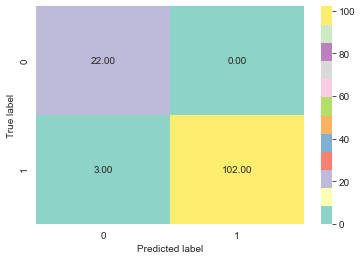

In [217]:
lr_cm = metrics.confusion_matrix(y_pred.predicted, y_pred.actual)
sns.heatmap(
    lr_cm,
    annot=True,
    cmap='Set3',
    fmt='.2f',
)

plt.ylabel('True label')
plt.xlabel('Predicted label')

## Important Notes

We got out best score using Logistic Regression. The predictions score with the test data in the train dataset comes to be around 99.8%.

If we use test data, we got a prediction score of around 97.6%.

## If there are any challenges/remarks in the case study analysis, kindly let me know so I can improve myself on my mistakes just like these Machine Learning Models. :D 

### Thank You!